# Project 2

<b> Hendyel Pacheco </b>

<b> Lihe Liu </b>

## Data:
The data file for this problem set is [here](https://github.com/CompTools/project2-cattlecoders-porject2/blob/master/flights.subset2.csv)

## Resolution:

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("flights.subset2.csv", sep = ',')

#Creating an array for each vector
y = data.ORIGIN_STATE_ABR.unique()
total = []
delayed1 = []
delayed1_all = []

#creating each vector
for name in y:
    total.append(data.ORIGIN_STATE_ABR.str.count(name).sum())
    delayed1.append(data[(data.ORIGIN_STATE_ABR==name)&(data.DEP_DEL15==1)].DEP_DEL15.count())
    delayed1_all.append(data[(data.ORIGIN_STATE_ABR==name)&(data.DEP_DELAY_NEW > 0.00)].DEP_DELAY_NEW.count())

#ploting the new dataframe
newdata = {'Total Flights': pd.Series(total,index = y),
           'Delayed All' : pd.Series(delayed1_all, index = y),
           'Delayed15min' : pd.Series(delayed1,index =y)}

flightout = pd.DataFrame(newdata) 
flightout.to_csv("NumberFlights.csv")

print(flightout)



    Total Flights  Delayed All  Delayed15min
CA             27           15             8
NY              4            3             2
HI              1            1             1
NJ              8            5             4
WA              2            2             1
IL              3            2             1
TX              2            0             0
NV              2            1             1


<b>Plot comparing the number of: Total Flights, All flights delayed, and flights delayed more than 15 minutes<\b>

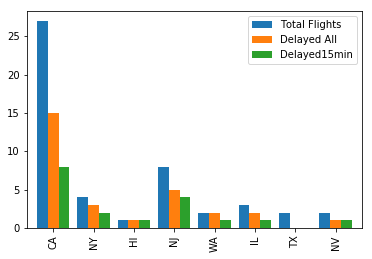

In [76]:
flightplot = flightout.plot(kind="bar", width = 0.8)

<b>Get the total number of flights and delayed ones, ask the user which orgin state and destination state:</b>

In [92]:
#open output files
f = open("NumberFlights.csv")
f2 = open("Description.txt","w+")

### Defination of functions
# Asking for the state name
def countflights():
    global results

    while True:
        origin = input('Enter origin state name abreviation: ''\n')
        if origin.isupper() and origin.isalpha():
            break
        else:
            states = data.ORIGIN_STATE_ABR.unique()
            print('Please, choose one of these states and try again:\n ',sorted(states),"\n")        
   
    # Counting the number of total flights and delayed departure and arrival from the origin chosen by the user: 
    totalflights1 = data.ORIGIN_STATE_ABR.str.count(origin).sum()
    delayed1 = data[(data.ORIGIN_STATE_ABR==origin)&(data.DEP_DEL15==1)].DEP_DEL15.count()
    delayed1_all = data[(data.ORIGIN_STATE_ABR==origin)&(data.DEP_DELAY_NEW > 0.00)].DEP_DELAY_NEW.count()
    totalflights2 = data.DEST_STATE_ABR.str.count(origin).sum()
    delayed2 = data[(data.DEST_STATE_ABR==origin)&(data.ARR_DEL15==1)].ARR_DEL15.count()
    delayed2_all = data[(data.DEST_STATE_ABR==origin)&(data.ARR_DELAY_NEW > 0.00)].ARR_DELAY_NEW.count()
    totalflights = totalflights1 + totalflights2
   
    ## print out results: 
   
    results = '\nThe state %s was involved in %d flights. %d departured from here, %d of them were delayed and %d of them are delayed more than 15 min. %d arrived at here, %d of them were delayed and %d of them are delayed more than 15 min.' %(origin,totalflights,totalflights1,delayed1_all,delayed1,totalflights2,delayed2_all,delayed2)
    
    return results

countflights()

f2.write(results)
f2.close()

print(results)

Enter origin state name abreviation: 
NJ

The state NJ was involved in 16 flights. 8 departured from here, 5 of them were delayed and 4 of them are delayed more than 15 min. 8 arrived at here, 5 of them were delayed and 4 of them are delayed more than 15 min.


<b>Get stats of the distance.</b>

In [90]:
def getstats():
    global results2
    while True:
        origin = input('Enter origin state name abreviation: ''\n')
        if origin.isupper() and origin.isalpha():
            break
        else:
            states = data.ORIGIN_STATE_ABR.unique()
            print('Please, choose one of these states and try again:\n ',sorted(states),"\n")
            
    Maxdist1 = data[(data.ORIGIN_STATE_ABR==origin)].DISTANCE.describe()[7]
    Mindist1 =  data[(data.ORIGIN_STATE_ABR==origin)].DISTANCE.describe()[3]
    Meandist1 =  data[(data.ORIGIN_STATE_ABR==origin)].DISTANCE.describe()[1]
    Maxdelaytime2 = data[(data.ORIGIN_STATE_ABR==origin)].DEP_DELAY_NEW.describe()[7]
    Mindelaytime2 =  data[(data.ORIGIN_STATE_ABR==origin)].DEP_DELAY_NEW.describe()[3]
    Meandelaytime2 =  data[(data.ORIGIN_STATE_ABR==origin)].DEP_DELAY_NEW.describe()[1]
    Maxdelaytime3 = data[(data.DEST_STATE_ABR==origin)].ARR_DELAY_NEW.describe()[7]
    Mindelaytime3 =  data[(data.DEST_STATE_ABR==origin)].ARR_DELAY_NEW.describe()[3]
    Meandelaytime3 =  data[(data.DEST_STATE_ABR==origin)].ARR_DELAY_NEW.describe()[1]

    results2 = '\nFor all the flights departing/arriving from/at %s, the maximum, minimum and the average distance are %d, %d and %d, respectively. \nFor all the flights arriving at %s, the maximum, minimum and the dealy time are %d, %d and %d, respectively. \nFor all the flights departing from %s, the maximum, minimum and the dealy time are %d, %d and %d, respectively.' %(origin,Maxdist1,Mindist1,Meandist1,origin,Maxdelaytime3,Meandelaytime3,Mindelaytime3,origin,Maxdelaytime2,Mindelaytime2,Meandelaytime2)
    
    return results2

getstats()

f2 = open("Description.txt","a")
f2.write(results2)
f2.close()

print(results2)

Enter origin state name abreviation: 
NJ

For all the flights departing/arriving from/at NJ, the maximum, minimum and the average distance are 2565, 2454 and 2509, respectively. 
For all the flights arriving at NJ, the maximum, minimum and the dealy time are 166, 73 and 0, respectively. 
For all the flights departing from NJ, the maximum, minimum and the dealy time are 171, 0 and 60, respectively.
